In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DDWZurnDTIYZsu3j5iZ8")
project = rf.workspace("piyush-kumar-n50aa").project("pulp-unwlv")
version = project.version(7)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pulp-7 in yolov11:: 100%|██████████| 1380/1380 [00:00<00:00, 6241.03it/s]


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [26]:
text="""
train: /kaggle/working/pulp-7/train/images
val: /kaggle/working/pulp-7/valid/images
test: /kaggle/working/pulp-7/test/images

nc: 2
names: ['Yellow Part', 'white part']
roboflow:
    workspace: piyush-kumar-n50aa
    project: pulp-unwlv
    version: 7
    license: CC BY 4.0
    url:https: //universe.roboflow.com/piyush-kumar-n50aa/pulp-unwlv/dataset/7
"""

In [27]:
def text2file(text,filepath):
    with open(filepath,'w')as file:
        file.write(text)
        
text2file(text,'output.yaml')        

In [10]:
import YOLO
Model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")

Transferred 499/561 items from pretrained weights


In [28]:
!yolo task= segment mode=train data=/kaggle/working/output.yaml model=/kaggle/working/yolo11n.pt epochs=20 imgsz=640

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolo11n.pt, data=/kaggle/working/output.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

In [32]:
!yolo task=segment mode=predict model=/kaggle/working/runs/detect/train6/weights/best.pt imgsz=640 conf=0.5 source=/kaggle/working/pulp-7/test/images

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/27 /kaggle/working/pulp-7/test/images/0c9ae204-20240611_104623_jpg.rf.bc00aa45d43b06d4e769e9dc1d40d7ba.jpg: 640x640 2 Yellow Parts, 2 white parts, 11.7ms
image 2/27 /kaggle/working/pulp-7/test/images/301680be-20240611_115650_jpg.rf.8409ca55094de67445a08d963127b097.jpg: 640x640 2 Yellow Parts, 2 white parts, 9.2ms
image 3/27 /kaggle/working/pulp-7/test/images/3a6000a3-8H_-_3-_jpg.rf.4f3966eb110738e2bd1359cfbe26dbe6.jpg: 640x640 2 Yellow Parts, 2 white parts, 7.8ms
image 4/27 /kaggle/working/pulp-7/test/images/45915558-6H_-_15-_1_jpg.rf.f2e559b720afbcb17f91c27eb45d544e.jpg: 640x640 2 Yellow Parts, 2 white parts, 7.7ms
image 5/27 /kaggle/working/pulp-7/test/images/58ab0657-

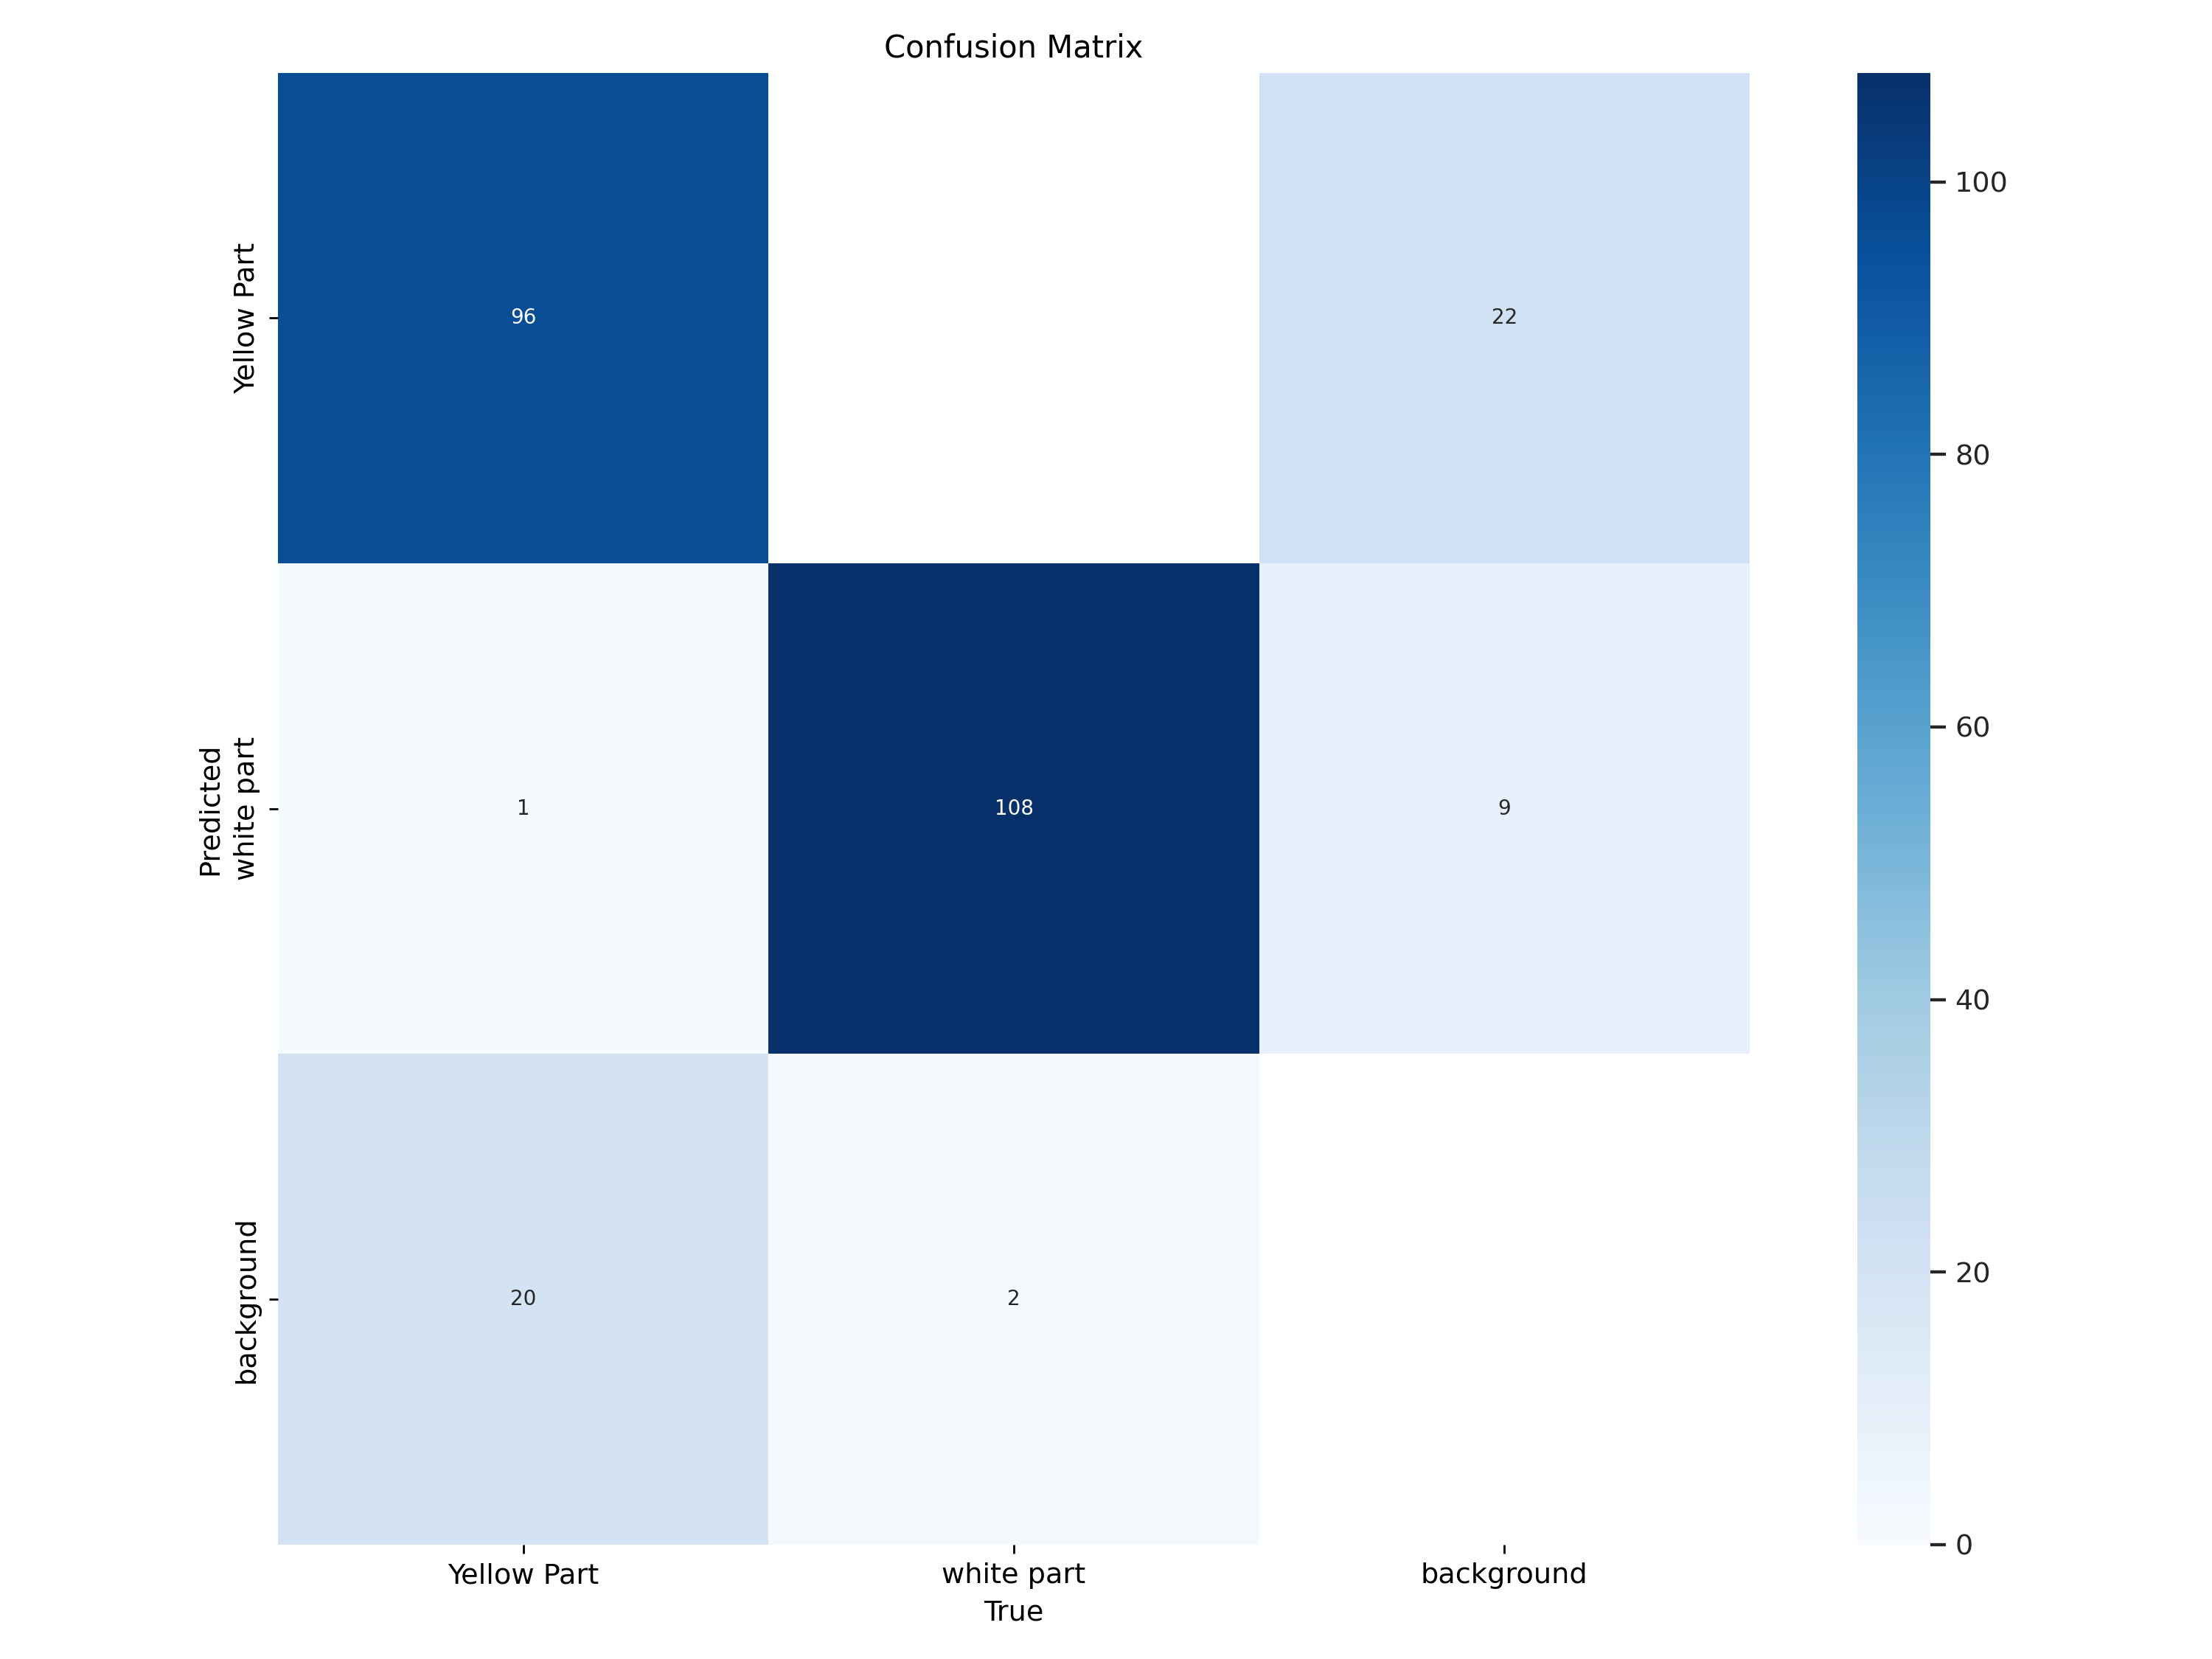

In [29]:

import glob
from IPython.display import Image, display


display(Image(filename=f"/kaggle/working/runs/detect/train6/confusion_matrix.png"))

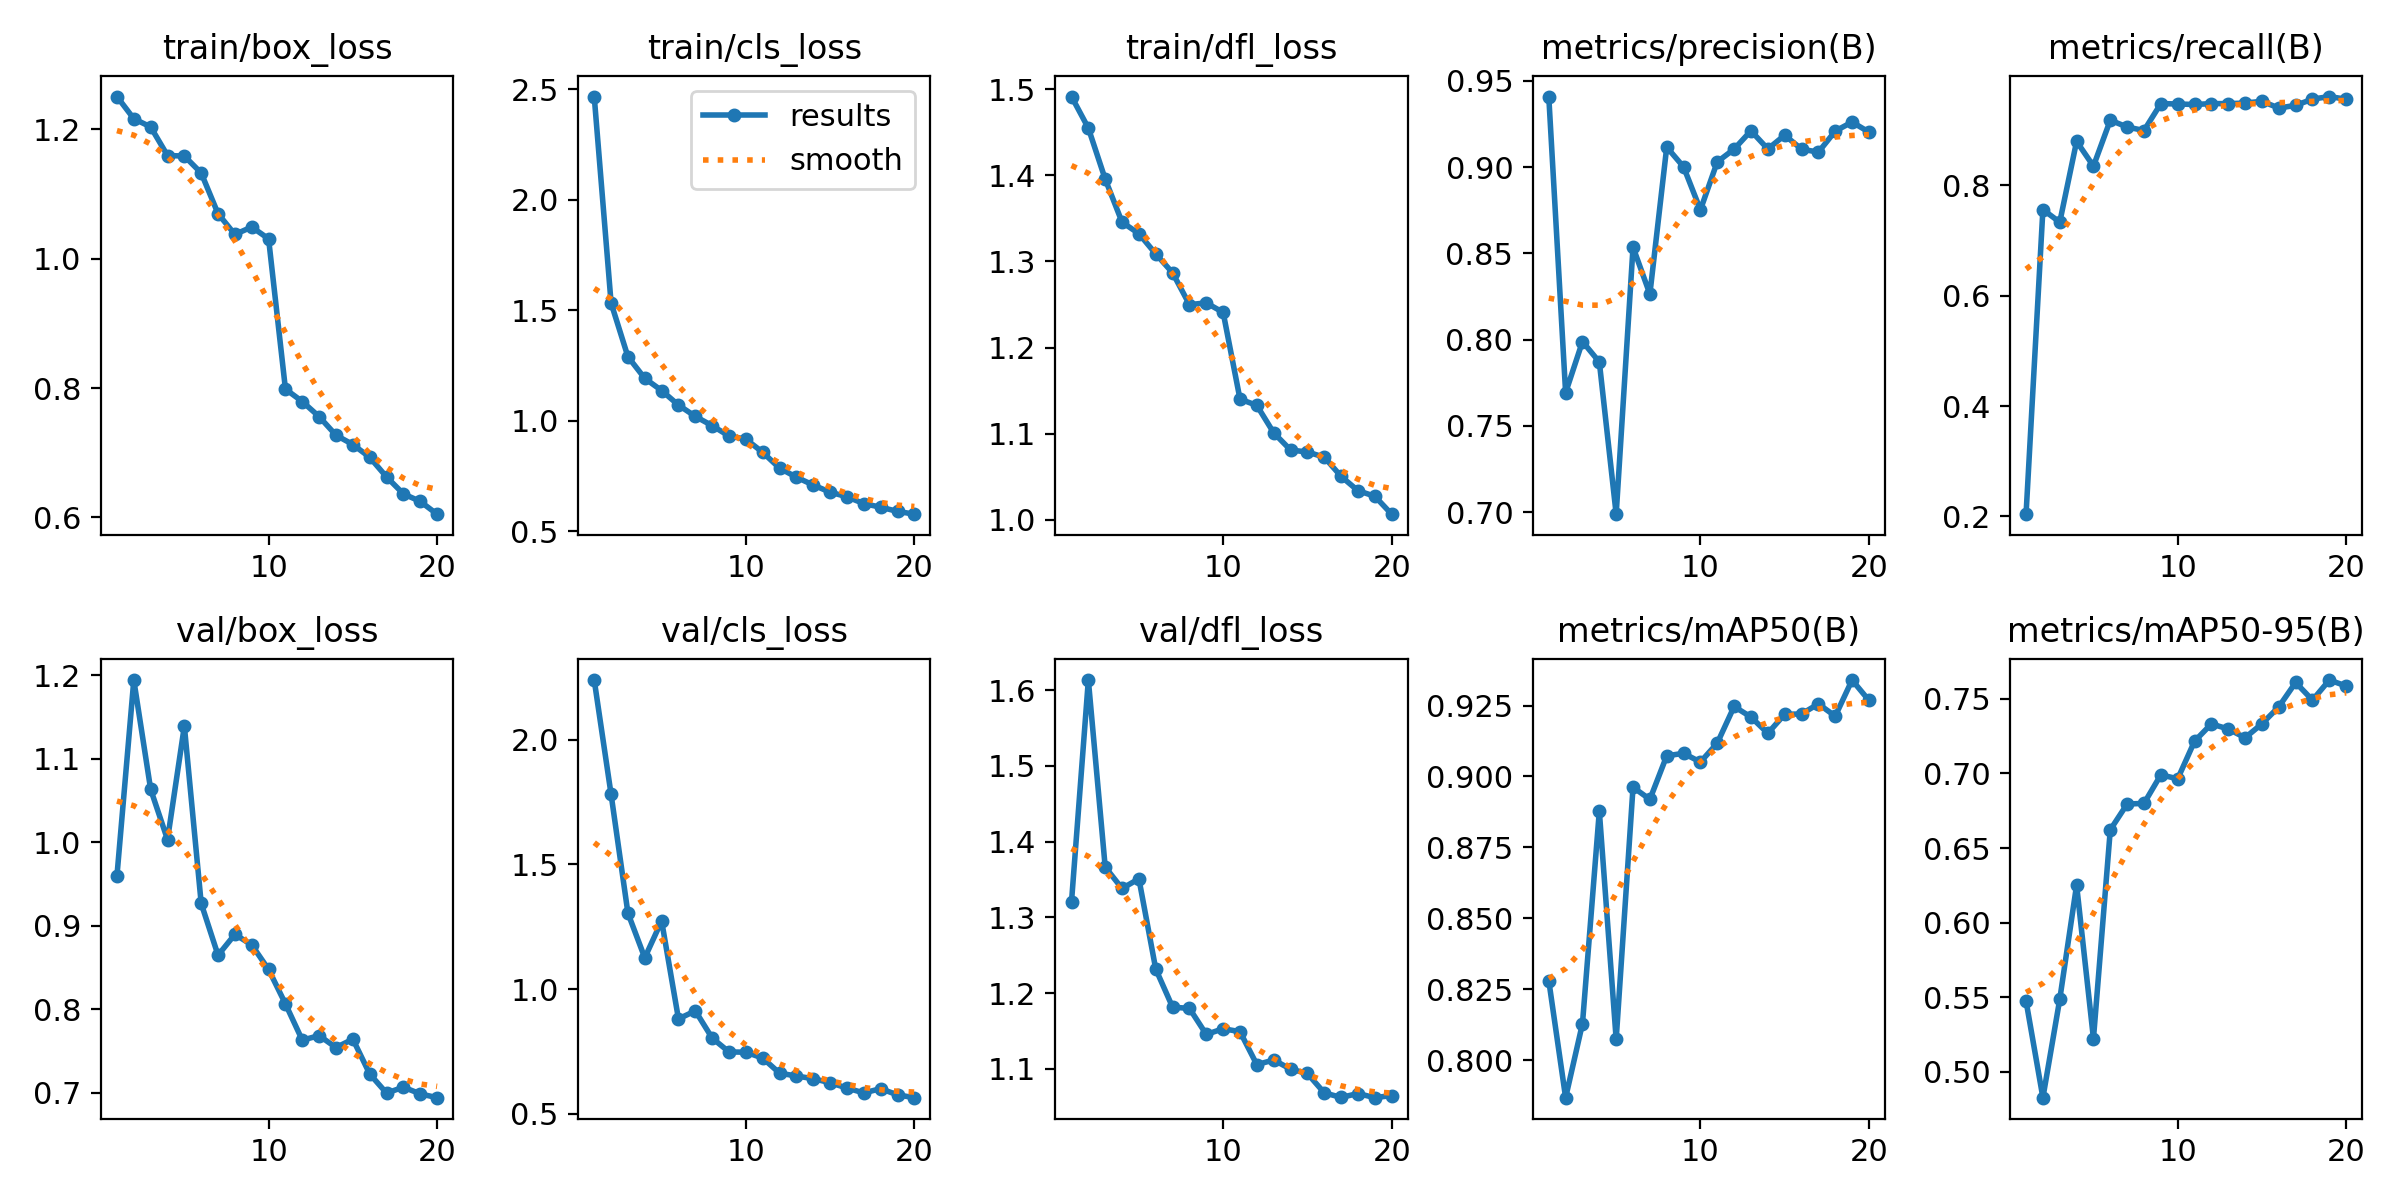

In [31]:
display(Image(filename=f"/kaggle/working/runs/detect/train6/results.png"))